**SIN-393 - Introdução à Visão Computacional (2022-2)**

# Projeto Classificação de Imagens

Nome: Caio da Silva de Miranda

Matrícula: 6368

---

## Importando as bibliotecas 
---

In [1]:
import os

import numpy as np
from skimage import util, transform, filters, color, measure, morphology
from sklearn import model_selection, neighbors, metrics, preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
np.random.seed(393)

from skimage import io

%matplotlib notebook

## Preparando o conjunto de dados do projeto
---
* Vamos utilizar um conjunto de dados fornecido pelo professor contendo:
* 4 Classes:
    * 0 apple;
    * 1 bat;
    * 2 beetle;
    * 3 bone;
* 720 objetos:   
    * 180 objetos de cada classe.

## Importando Datasets necessários

In [2]:
# Cada conjunto possui 4 classes (apple, bat, beetle, bone)
datasetTeste = 'datasets/Test'

datasetTreino = 'datasets/Train'

## Checagem

In [3]:
# Checagem para saber se os datasets foram recebidos corretamente
print(datasetTeste)

print(datasetTreino)

datasets/Test
datasets/Train


## Carregando as imagens de ambos Datasets

### Dataset Treino

In [4]:
# Lista das pastas na pasta 'Train' (classes)
classes_list = os.listdir(datasetTreino)

# Lista com as imagens no dataset
image_list = []
# Lista com os rótulos das imagens
label_list = []

# Lista com os nomes das imagens
filename_list_ = []

# Percorre as classes do dataset
for classe in classes_list:
    
    # Listagem de todas as imagens na pasta daquela classe
    filename_list = os.listdir(os.path.join(datasetTreino, classe))
    
    # Percorre os arquivos na pasta atual
    for filename in filename_list:
        # Carrega a imagem
        img_temp = io.imread(os.path.join(datasetTreino, classe, filename))
        
        # Adiciona a imagem a lista de imagens
        image_list.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_.append(filename)

In [5]:
# Lista com os rótulos das imagens        
print(label_list)

['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 

### Dataset Teste

In [6]:
# Lista das pastas na pasta 'Test' (classes)
classes_list2 = os.listdir(datasetTeste)

# Lista com as imagens no dataset
image_list2 = []
# Lista com os rótulos das imagens
label_list2 = []

# Lista com os nomes das imagens
filename_list_2 = []

# Percorre as classes do dataset
for classe in classes_list2:
    
    # Listagem de todas as imagens na pasta daquela classe
    filename_list2 = os.listdir(os.path.join(datasetTeste, classe))
    
    # Percorre os arquivos na pasta atual
    for filename in filename_list2:
        # Carrega a imagem
        img_temp = io.imread(os.path.join(datasetTeste, classe, filename))
        
        # Adiciona a imagem a lista de imagens
        image_list2.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list2.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_2.append(filename)

In [7]:
# Lista com os rótulos das imagens        
print(label_list2)

['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beet

### Convertendo os nomes das classes para índices numéricos

### Treino

In [8]:
# Indices das classes dos objetos do dataset
_, _, label_list_idx = np.unique(label_list, return_index=True, return_inverse=True)

print(type(label_list_idx))
print(label_list_idx)

### label_list_idx = np.array(label_list_idx)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 

### Teste

In [9]:
# Indices das classes dos objetos do dataset
_, _, label_list_idx2 = np.unique(label_list2, return_index=True, return_inverse=True)

print(type(label_list_idx2))
print(label_list_idx2)

### label_list_idx = np.array(label_list_idx)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


## Extraindo algumas caracteristicas das imagens
----
* Vamos extrair algumas caracteristicas de forma dos objetos nas imagens.
    * Área, maior eixo, menor eixo e solidez.
* Primeiramente precisamos criar um vetor que receberá as características.
* Também será necessário criar um contador para sabermos quantas imagens tiveram problemas durante o processo de extração, e mais à frente calcularmos a diferença que cada classe teve, ou seja, identificar o numero total de imagens bem sucedidas e que servirão para a procedência do projeto.

### Extraindo do Dataset Treino

In [10]:
# Nomes das caracteristicas computadas
features = ['area', 'major_axis', 'minor_axis', 'solidity']

In [11]:
# Arranjo 2D com as caracteristicas das imagens
#   Cada linha armazena informações sobre uma imagem. Cada coluna armazena uma caracteristica.
#   [ [area, major_axis, minor_axis, solidity, eccentricity] ]
feature_mat = []

# Lista com as imagens segmentadas (binárias)
seg_list = []

# Lista com os rótulos das imagens
list_label = []

#Contador de imagens que obtiveram problemas durante extração de características
errorcount = []

for i, (image, label) in enumerate(zip(image_list, label_list)):
    # DEBUG
    print('Imagem {} - classe {}'.format(i, label))
    
    # Adiciona o rótulos (label) da imagem à lista
    list_label.append(label)
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    props = measure.regionprops(image.astype(int))
    
    ###print(len(props))
    if len(props) != 1:
        
        errorcount.append((i,label))
        print(f'ERRO de segmentação: {len(props)}')
        continue

    # Itera pelas propriedades computadas
    for prop in props:
        # Prop. 0: Area
        area = prop.area
       
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length 
        
        # Prop. 3: Solidez
        solidity = prop.solidity 

        # Monta o vetor de caracteristicas deste objeto.
        feature_list = [area, major_axis, minor_axis, solidity]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat.append(feature_list)

Imagem 0 - classe apple
Imagem 1 - classe apple
Imagem 2 - classe apple
Imagem 3 - classe apple
Imagem 4 - classe apple
Imagem 5 - classe apple
Imagem 6 - classe apple
Imagem 7 - classe apple
Imagem 8 - classe apple
Imagem 9 - classe apple
Imagem 10 - classe apple
Imagem 11 - classe apple
Imagem 12 - classe apple
Imagem 13 - classe apple
Imagem 14 - classe apple
Imagem 15 - classe apple
Imagem 16 - classe apple
Imagem 17 - classe apple
Imagem 18 - classe apple
Imagem 19 - classe apple
Imagem 20 - classe apple
Imagem 21 - classe apple
Imagem 22 - classe apple
Imagem 23 - classe apple
Imagem 24 - classe apple
Imagem 25 - classe apple
Imagem 26 - classe apple
Imagem 27 - classe apple
Imagem 28 - classe apple
Imagem 29 - classe apple
Imagem 30 - classe apple
Imagem 31 - classe apple
Imagem 32 - classe apple
Imagem 33 - classe apple
Imagem 34 - classe apple
Imagem 35 - classe apple
Imagem 36 - classe apple
Imagem 37 - classe apple
Imagem 38 - classe apple
Imagem 39 - classe apple
Imagem 40 

Imagem 330 - classe beetle
Imagem 331 - classe beetle
Imagem 332 - classe beetle
Imagem 333 - classe beetle
Imagem 334 - classe beetle
Imagem 335 - classe beetle
Imagem 336 - classe beetle
Imagem 337 - classe beetle
Imagem 338 - classe beetle
Imagem 339 - classe beetle
Imagem 340 - classe beetle
Imagem 341 - classe beetle
Imagem 342 - classe beetle
Imagem 343 - classe beetle
Imagem 344 - classe beetle
Imagem 345 - classe beetle
Imagem 346 - classe beetle
Imagem 347 - classe beetle
Imagem 348 - classe beetle
Imagem 349 - classe beetle
Imagem 350 - classe beetle
Imagem 351 - classe beetle
Imagem 352 - classe beetle
Imagem 353 - classe beetle
Imagem 354 - classe beetle
Imagem 355 - classe beetle
Imagem 356 - classe beetle
Imagem 357 - classe beetle
Imagem 358 - classe beetle
Imagem 359 - classe beetle
Imagem 360 - classe beetle
Imagem 361 - classe beetle
Imagem 362 - classe beetle
Imagem 363 - classe beetle
Imagem 364 - classe beetle
Imagem 365 - classe beetle
Imagem 366 - classe beetle
I

### Exibindo imagens mal sucedidas

In [12]:
print(errorcount)

[]


In [13]:
# Converte a lista de caracteristicas para um arranjo NumPy
feature_map = np.array(feature_mat)

# Imprime a matriz de caracteristica
with np.printoptions(precision=4, suppress=True):
    print(feature_map)

[[28036.       194.6852   188.6138     0.9042]
 [ 8423.       131.7626    82.9487     0.9162]
 [12699.       133.8974   124.2146     0.8991]
 ...
 [10799.       438.5385    51.8956     0.5254]
 [12800.       414.9407    78.0069     0.4466]
 [ 9914.       375.2715    65.5807     0.4519]]


In [14]:
# Algumas estatisticas sobre o conjunto de caracteristicas
with np.printoptions(precision=4, suppress=True):
    print(feature_map.min(0))
    print(feature_map.max(0))
    print(feature_map.mean(0))
    print(feature_map.std(0))

[1586.       57.0093   21.1203    0.3297]
[105251.        707.3031    364.5932      0.9696]
[15616.6944   261.8113   103.5262     0.6246]
[15675.0735   146.4261    55.812      0.1964]


### Extraindo do Dataset Teste

In [15]:
# Nomes das caracteristicas computadas
features2 = ['area2', 'major_axis2', 'minor_axis2', 'solidity2']

In [16]:
# Arranjo 2D com as caracteristicas das imagens
#   Cada linha armazena informações sobre uma imagem. Cada coluna armazena uma caracteristica.
#   [ [area, major_axis, minor_axis, solidity, eccentricity] ]
feature_mat2 = []

# Lista com as imagens segmentadas (binárias)
seg_list2 = []

# Lista com os rótulos das imagens
list_label2 = []

#Contador de erros
errorcount2 = []

for i2, (image2, label2) in enumerate(zip(image_list2, label_list2)):
    # DEBUG
    print('Imagem {} - classe {}'.format(i2, label2))
    
    # Adiciona o rótulos (label) da imagem à lista
    list_label2.append(label2)
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    props2 = measure.regionprops(image2.astype(int))
    
    ###print(len(props))
    if len(props2) != 1:
        
        errorcount2.append((i2,label2))
        print(f'ERRO de segmentação: {len(props2)}')
        continue

    # Itera pelas propriedades computadas
    for prop2 in props2:
        # Prop. 0: Area
        area2 = prop2.area
       
        # Prop. 1: Maior eixo
        major_axis2 = prop2.major_axis_length
        
        # Prop. 2: Menor eixo
        minor_axis2 = prop2.minor_axis_length 
        
        # Prop. 3: Solidez
        solidity2 = prop2.solidity 

        # Monta o vetor de caracteristicas deste objeto.
        feature_list2 = [area2, major_axis2, minor_axis2, solidity2]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat2.append(feature_list2)

Imagem 0 - classe apple
Imagem 1 - classe apple
Imagem 2 - classe apple
Imagem 3 - classe apple
Imagem 4 - classe apple
Imagem 5 - classe apple
Imagem 6 - classe apple
Imagem 7 - classe apple
Imagem 8 - classe apple
Imagem 9 - classe apple
Imagem 10 - classe apple
Imagem 11 - classe apple
Imagem 12 - classe apple
Imagem 13 - classe apple
Imagem 14 - classe apple
Imagem 15 - classe apple
Imagem 16 - classe apple
Imagem 17 - classe apple
Imagem 18 - classe apple
Imagem 19 - classe apple
Imagem 20 - classe apple
Imagem 21 - classe apple
Imagem 22 - classe apple
Imagem 23 - classe apple
Imagem 24 - classe apple
Imagem 25 - classe apple
Imagem 26 - classe apple
Imagem 27 - classe apple
Imagem 28 - classe apple
Imagem 29 - classe apple
Imagem 30 - classe apple
Imagem 31 - classe apple
Imagem 32 - classe apple
Imagem 33 - classe apple
Imagem 34 - classe apple
Imagem 35 - classe apple
Imagem 36 - classe apple
Imagem 37 - classe apple
Imagem 38 - classe apple
Imagem 39 - classe apple
Imagem 40 

### Exibindo imagens mal sucedidas

In [17]:
print(errorcount2)

[]


In [18]:
# Converte a lista de caracteristicas para um arranjo NumPy
feature_map2 = np.array(feature_mat2)

# Imprime a matriz de caracteristica
with np.printoptions(precision=4, suppress=True):
    print(feature_map2)

[[ 28279.        192.6497    190.1819      0.92  ]
 [ 28036.        194.6852    188.6138      0.9042]
 [ 28279.        192.6497    190.1819      0.92  ]
 [ 28036.        194.6852    188.6138      0.9042]
 [ 28279.        192.6497    190.1819      0.92  ]
 [ 28279.        192.6497    190.1819      0.92  ]
 [ 33237.        224.5994    197.2358      0.885 ]
 [ 33237.        224.5994    197.2358      0.885 ]
 [ 33790.        213.8092    206.9224      0.9123]
 [ 33790.        213.8092    206.9224      0.9123]
 [ 35963.        226.6725    206.6018      0.9111]
 [ 35963.        226.6725    206.6018      0.9111]
 [ 28473.        200.6764    187.9464      0.9345]
 [ 28473.        200.6764    187.9464      0.9345]
 [ 37645.        235.0318    211.7649      0.9144]
 [ 37645.        235.0318    211.7649      0.9144]
 [ 29956.        206.2293    189.9088      0.9326]
 [ 29956.        206.2293    189.9088      0.9326]
 [ 37498.        226.519     216.7854      0.9147]
 [ 37498.        226.519     21

In [19]:
# Algumas estatisticas sobre o conjunto de caracteristicas
with np.printoptions(precision=4, suppress=True):
    print(feature_map2.min(0))
    print(feature_map2.max(0))
    print(feature_map2.mean(0))
    print(feature_map2.std(0))

[11409.       158.8008    63.8133     0.3298]
[105251.        707.3372    364.5932      0.9696]
[39276.0093   423.4613   181.2386     0.617 ]
[24201.9477   201.9946    64.4784     0.1973]


### Preparando os dados para serem computados
---

* Aqui estamos calculando a diferença para cada classe do dataset completo, pelas imagens que não passaram do processo de extração.

### Treino

In [20]:
cont_apple = 0
cont_beetle = 0
cont_bat = 0
cont_bone = 0

for num, classe in errorcount:
    if classe == 'apple':
        cont_apple = cont_apple + 1
    if classe == 'beetle':
        cont_beetle = cont_beetle + 1
    if classe == 'bat':
        cont_bat = cont_bat + 1
    if classe == 'bone':
        cont_bone = cont_bone + 1

In [21]:
list_labels_treino = list()
for i in range(126 - cont_apple):
    list_labels_treino.append('apple')
for i in range(126 - cont_beetle):
    list_labels_treino.append('beetle')
for i in range(126 - cont_bat):
    list_labels_treino.append('bat')
for i in range(126 - cont_bone):
    list_labels_treino.append('bone')

In [22]:
print(cont_apple)
print(cont_beetle)
print(cont_bat)
print(cont_bone)

0
0
0
0


### Teste

In [23]:
cont_apple = 0
cont_beetle = 0
cont_bat = 0
cont_bone = 0

for num, classe in errorcount2:
    if classe == 'apple':
        cont_apple = cont_apple + 1
    if classe == 'beetle':
        cont_beetle = cont_beetle + 1
    if classe == 'bat':
        cont_bat = cont_bat + 1
    if classe == 'bone':
        cont_bone = cont_bone + 1

In [24]:
list_labels_teste = list()
for i in range(54 - cont_apple):
    list_labels_teste.append('apple')
for i in range(54 - cont_beetle):
    list_labels_teste.append('beetle')
for i in range(54 - cont_bat):
    list_labels_teste.append('bat')
for i in range(54 - cont_bone):
    list_labels_teste.append('bone')

In [25]:
print(cont_apple)
print(cont_beetle)
print(cont_bat)
print(cont_bone)

0
0
0
0


### Plotando as caracteristicas computadas

### Treino

In [26]:
df = pd.DataFrame(feature_map, columns=features)

df['class'] = list_labels_treino

### print(df)
display(df)

,area,major_axis,minor_axis,solidity,class
0,28036.0,194.685177,188.613812,0.904154,apple
1,8423.0,131.762581,82.948675,0.916241,apple
2,12699.0,133.897382,124.214636,0.899108,apple
3,7787.0,117.650008,86.718927,0.898984,apple
4,3684.0,112.116291,42.406192,0.918016,apple
...,...,...,...,...,...
499,5441.0,246.109485,54.878113,0.446569,bone
500,11678.0,514.592999,56.947378,0.447210,bone
501,10799.0,438.538516,51.895554,0.525422,bone
502,12800.0,414.940679,78.006942,0.446647,bone


<IPython.core.display.Javascript object>


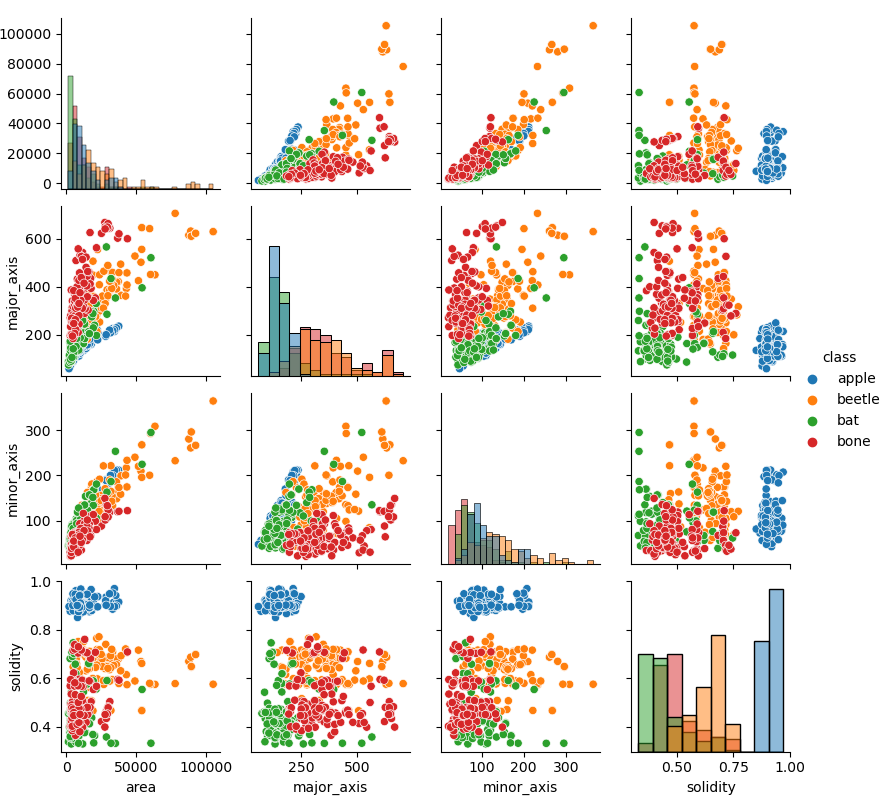

In [27]:
g = sns.PairGrid(df, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Teste

In [28]:
df = pd.DataFrame(feature_map2, columns=features2)

df['class'] = list_labels_teste

### print(df)
display(df)

,area2,major_axis2,minor_axis2,solidity2,class
0,28279.0,192.649724,190.181886,0.920031,apple
1,28036.0,194.685177,188.613812,0.904154,apple
2,28279.0,192.649724,190.181886,0.920031,apple
3,28036.0,194.685177,188.613812,0.904154,apple
4,28279.0,192.649724,190.181886,0.920031,apple
...,...,...,...,...,...
211,30048.0,645.618973,123.903548,0.478761,bone
212,29482.0,649.838829,133.065921,0.453541,bone
213,29482.0,649.838829,133.065921,0.453541,bone
214,27895.0,642.060045,108.843082,0.450704,bone


<IPython.core.display.Javascript object>


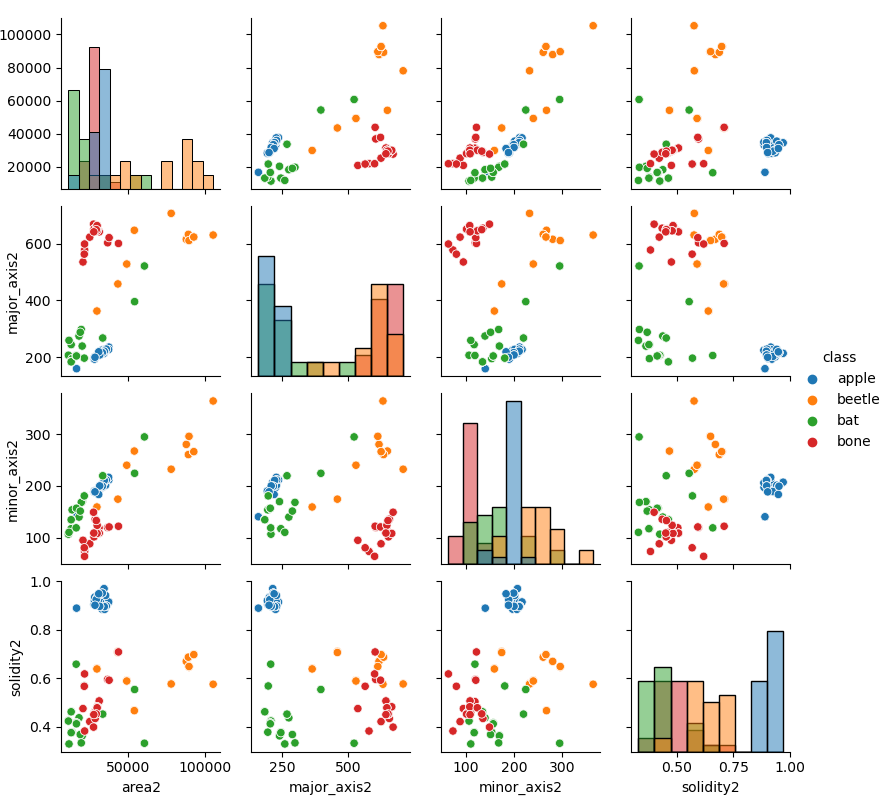

In [29]:
g = sns.PairGrid(df, hue='class', vars=features2)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Normalizando as caracteristicas
---

* As caracteristicas obtidas podem apresentar faixas de valores muito diferentes. 
    * Isso pode dificultar o treinamento do modelo. 
    * Neste exemplo, a faixa de valores da 'area' vai de 17.644 até 62.862, aproximadamente, já a faixa de valores da circularidade vai de 0,0 até 1,0.
* A normalização transforma as caracteristicas de forma que elas estejam em faixas de valores equivalentes. 
* A ```transformada normal de caracteristicas``` consistem em subtrair a média do conjunto de dados e, em seguida, dividir pelo desvio padrão. 
    * A transformada normal de caracteristicas gera um conjunto de dados com média 0 e desvio padrão 1.

### Normalizando para dataset Treino

In [30]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map.std(0))

Média:
[15616.6944   261.8113   103.5262     0.6246]
Desvio padrão:
[15675.0735   146.4261    55.812      0.1964]


In [31]:
# Transformada Normal de Caracteristicas
feature_map_norm = (feature_map - feature_map.mean(0)) / feature_map.std(0)

print(feature_map_norm)

[[ 0.79229648 -0.45843002  1.52453964  1.42366916]
 [-0.45892572 -0.88815268 -0.36869407  1.48521907]
 [-0.18613593 -0.8735733   0.37068044  1.39797409]
 ...
 [-0.30734749  1.20693841 -0.92508208 -0.50494726]
 [-0.17969258  1.04577969 -0.45723657 -0.90609555]
 [-0.36380655  0.7748637  -0.67988176 -0.87950318]]


In [32]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map_norm.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map_norm.std(0))

Média:
[-0. -0.  0. -0.]
Desvio padrão:
[1. 1. 1. 1.]


### Normalizando para dataset Teste

In [33]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map2.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map2.std(0))

Média:
[39276.0093   423.4613   181.2386     0.617 ]
Desvio padrão:
[24201.9477   201.9946    64.4784     0.1973]


In [34]:
# Transformada Normal de Caracteristicas
feature_map2_norm = (feature_map2 - feature_map2.mean(0)) / feature_map2.std(0)

print(feature_map2_norm)

[[-0.4543853  -1.14266223  0.1387013   1.53603992]
 [-0.46442581 -1.13258546  0.11438193  1.45555243]
 [-0.4543853  -1.14266223  0.1387013   1.53603992]
 [-0.46442581 -1.13258546  0.11438193  1.45555243]
 [-0.4543853  -1.14266223  0.1387013   1.53603992]
 [-0.4543853  -1.14266223  0.1387013   1.53603992]
 [-0.24952575 -0.98449126  0.24810113  1.35856778]
 [-0.24952575 -0.98449126  0.24810113  1.35856778]
 [-0.22667635 -1.03790978  0.39833027  1.49663017]
 [-0.22667635 -1.03790978  0.39833027  1.49663017]
 [-0.13689019 -0.97422829  0.39335914  1.49053871]
 [-0.13689019 -0.97422829  0.39335914  1.49053871]
 [-0.44636942 -1.10292524  0.10403121  1.60918417]
 [-0.44636942 -1.10292524  0.10403121  1.60918417]
 [-0.06739165 -0.93284436  0.47343403  1.50750174]
 [-0.06739165 -0.93284436  0.47343403  1.50750174]
 [-0.38509336 -1.07543498  0.13446599  1.59974762]
 [-0.38509336 -1.07543498  0.13446599  1.59974762]
 [-0.07346554 -0.97498816  0.55129634  1.50888561]
 [-0.07346554 -0.97498816  0.55

In [35]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map2_norm.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map2_norm.std(0))

Média:
[-0.  0.  0.  0.]
Desvio padrão:
[1. 1. 1. 1.]


### Plotando as caracteristicas normalizadas - Treino

In [36]:
df_norm = pd.DataFrame(feature_map_norm, columns=features)

df_norm['class'] = list_labels_treino
print(df_norm)

         area  major_axis  minor_axis  solidity  class
0    0.792296   -0.458430    1.524540  1.423669  apple
1   -0.458926   -0.888153   -0.368694  1.485219  apple
2   -0.186136   -0.873573    0.370680  1.397974  apple
3   -0.499500   -0.984533   -0.301141  1.397343  apple
4   -0.761253   -1.022325   -1.095106  1.494262  apple
..        ...         ...         ...       ...    ...
499 -0.649164   -0.107234   -0.871643 -0.906490   bone
500 -0.251271    1.726344   -0.834567 -0.903226   bone
501 -0.307347    1.206938   -0.925082 -0.504947   bone
502 -0.179693    1.045780   -0.457237 -0.906096   bone
503 -0.363807    0.774864   -0.679882 -0.879503   bone

[504 rows x 5 columns]


<IPython.core.display.Javascript object>


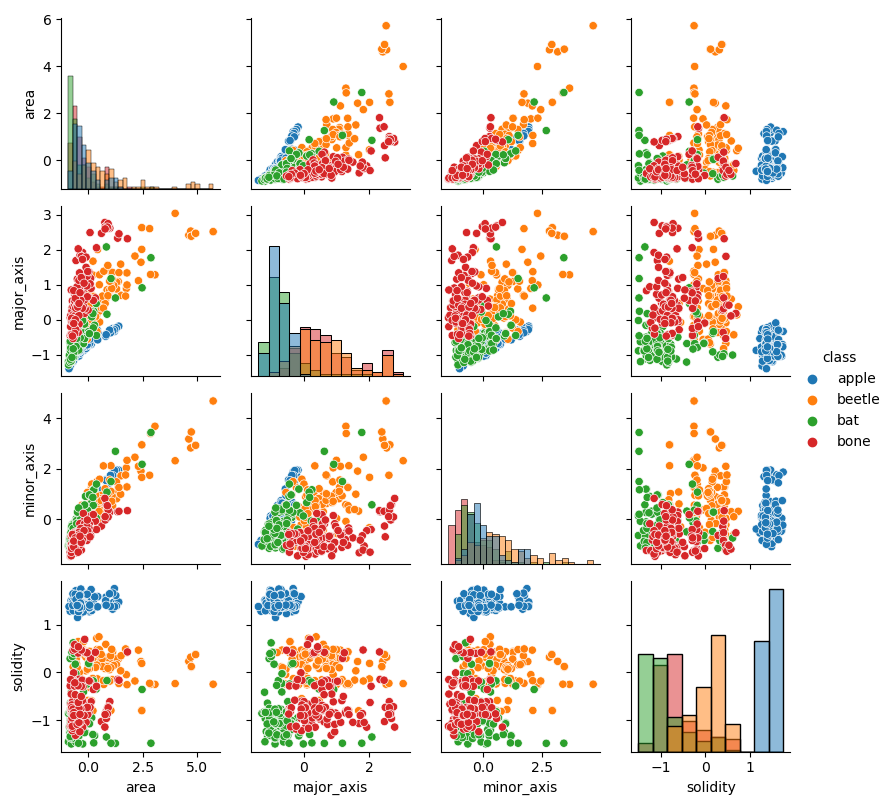

In [37]:
g = sns.PairGrid(df_norm, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Plotando as caracteristicas normalizadas - Teste

In [38]:
df_norm2 = pd.DataFrame(feature_map2_norm, columns=features2)

df_norm2['class'] = list_labels_teste
print(df_norm)

         area  major_axis  minor_axis  solidity  class
0    0.792296   -0.458430    1.524540  1.423669  apple
1   -0.458926   -0.888153   -0.368694  1.485219  apple
2   -0.186136   -0.873573    0.370680  1.397974  apple
3   -0.499500   -0.984533   -0.301141  1.397343  apple
4   -0.761253   -1.022325   -1.095106  1.494262  apple
..        ...         ...         ...       ...    ...
499 -0.649164   -0.107234   -0.871643 -0.906490   bone
500 -0.251271    1.726344   -0.834567 -0.903226   bone
501 -0.307347    1.206938   -0.925082 -0.504947   bone
502 -0.179693    1.045780   -0.457237 -0.906096   bone
503 -0.363807    0.774864   -0.679882 -0.879503   bone

[504 rows x 5 columns]


<IPython.core.display.Javascript object>


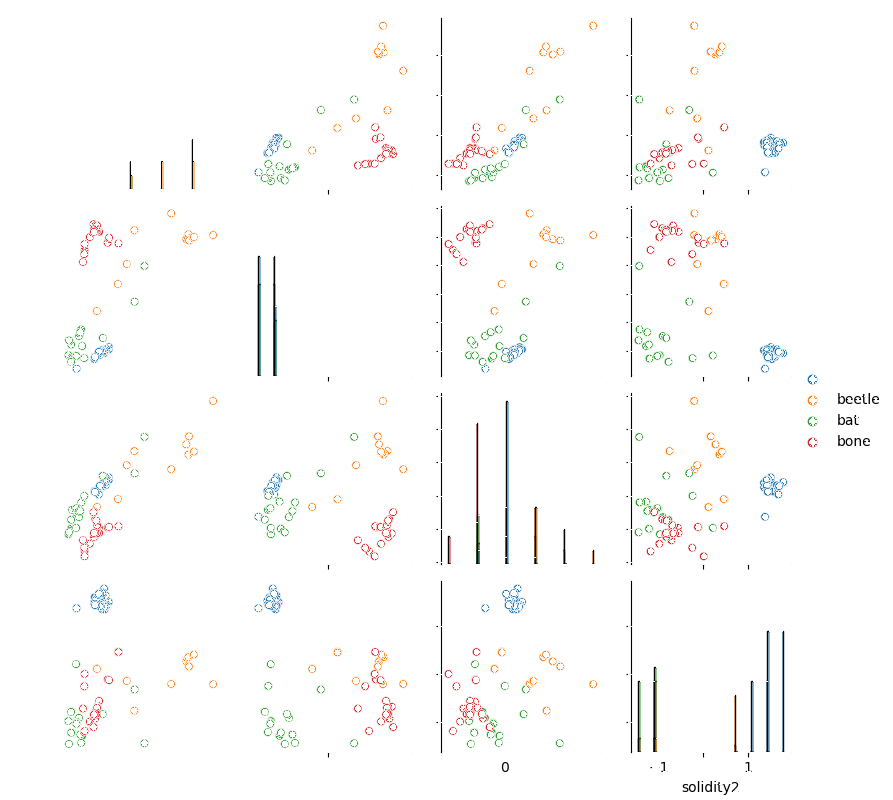

In [39]:
g = sns.PairGrid(df_norm2, hue='class', vars=features2)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Validação cruzada - Hold-out
---

* Separa o conjunto de dados em subconjuntos para treinamento, validação e testes. 
    * Neste exemplo, por motivos de simplificação, vamos dividir em treino e testes apenas.

In [40]:
# Selecionamos apenas duas caracteristicas: Área e maior-eixo
feature_map_ok = feature_map[:,0:2]

In [41]:
X_train = feature_map
X_test = feature_map2
y_train = list_labels_treino
y_test = list_labels_teste

### Normalizando as caracteristicas

* A normalização **não** deve ser realizada sobre todo o conjunto de dados. 
    * A normalização deve ser realizada **após** a divisão do conjunto para a validação cruzada.
    * O conjunto de testes não deve ser acessado, nem direta nem indiretamente, durante o treinamento ou durante o ajuste de hiperparâmetros. 
    * A normalização do conjunto de treinamento e também do conjunto de testes deve ser realizado usando apenas a média e o desvio padrão do conjunto de treinamento.

In [42]:
# Média das caracteristicas do conjunto de treinamento
X_train_mean = X_train.mean(0)
# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_std = X_train.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train.mean(0))
    print(X_train.std(0))

[15616.6944   261.8113   103.5262     0.6246]
[15675.0735   146.4261    55.812      0.1964]


In [43]:
# Transformada Normal de Caracteristicas
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std

with np.printoptions(precision=4, suppress=True):
    print(X_train_norm)
    print(X_test_norm)

[[ 0.7923 -0.4584  1.5245  1.4237]
 [-0.4589 -0.8882 -0.3687  1.4852]
 [-0.1861 -0.8736  0.3707  1.398 ]
 ...
 [-0.3073  1.2069 -0.9251 -0.5049]
 [-0.1797  1.0458 -0.4572 -0.9061]
 [-0.3638  0.7749 -0.6799 -0.8795]]
[[ 0.8078 -0.4723  1.5526  1.5045]
 [ 0.7923 -0.4584  1.5245  1.4237]
 [ 0.8078 -0.4723  1.5526  1.5045]
 [ 0.7923 -0.4584  1.5245  1.4237]
 [ 0.8078 -0.4723  1.5526  1.5045]
 [ 0.8078 -0.4723  1.5526  1.5045]
 [ 1.1241 -0.2541  1.679   1.3262]
 [ 1.1241 -0.2541  1.679   1.3262]
 [ 1.1594 -0.3278  1.8526  1.4649]
 [ 1.1594 -0.3278  1.8526  1.4649]
 [ 1.298  -0.24    1.8468  1.4588]
 [ 1.298  -0.24    1.8468  1.4588]
 [ 0.8202 -0.4175  1.5126  1.578 ]
 [ 0.8202 -0.4175  1.5126  1.578 ]
 [ 1.4053 -0.1829  1.9393  1.4759]
 [ 1.4053 -0.1829  1.9393  1.4759]
 [ 0.9148 -0.3796  1.5477  1.5685]
 [ 0.9148 -0.3796  1.5477  1.5685]
 [ 1.3959 -0.241   2.0293  1.4772]
 [ 1.3959 -0.241   2.0293  1.4772]
 [ 1.2297 -0.2596  1.8385  1.3221]
 [ 1.2297 -0.2596  1.8385  1.3221]
 [ 1.2701 -0.2

## Classificando usando K-vizinhos mais próximos
---

In [44]:
# Constrói um classificador do tipo K-NN onde K = 3.
clf = neighbors.KNeighborsClassifier(n_neighbors=3)

# Treinando o classificador
clf.fit(X_train_norm, y_train)

# Testando o classificador
pred = clf.predict(X_test_norm)

C:\Users\caio-\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Avaliando o modelo
---

In [45]:
# Acertos
acertos = y_test == pred

print('\n Predição:')
print(pred)
print('\nReal:')
print(y_test)
print('\nAcerto/Erro:')
print(acertos.astype(int))


 Predição:
['apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle'
 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle'
 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle'
 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle'
 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle'
 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle'
 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'beetle' 'bat'
 'beetle' 'bat' 'beetle' 'beetle' 'bat' 'b

### Matriz de confusão e o relatório de treinamento

In [46]:
print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, pred))


Matriz de confusão:
[[54  0  0  0]
 [ 0 42 12  0]
 [ 0  0 54  0]
 [ 0  0  0 54]]

Relatório de classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        54
         bat       1.00      0.78      0.88        54
      beetle       0.82      1.00      0.90        54
        bone       1.00      1.00      1.00        54

    accuracy                           0.94       216
   macro avg       0.95      0.94      0.94       216
weighted avg       0.95      0.94      0.94       216



## Otimizando hiperparametros com o conjunto de validação
---
* Não se deve realizar a otimização de hiperparâmetros usando o conjunto de testes.
* Dessa forma, separamos uma parte do conjunto de treinamento para validação.
* Para fazer isso usando o Scikit-learn:
    * Primeiro separamos o conjunte do dados total em teste e treino. 
    * Depois separamos o conjunto de treino em validação e conjunto de testes final. 

* *Exemplo:* 20% para testes, 20% para validação e 60% para treinamento.

```
 +-- Conjunto de dados - 100%
     +-- Conjunto de testes - 20%
     +-- Conjunto de treino 1 - 80%
         +-- Conjunto de validação - 20% do conjunto de dados = 25% do conjunto de treino 1 (0,2 / 0,8 = 0,25)
         +-- Conjunto de treino 2 - 60 % do conjunto de dados = 75% do conjunto de treino 1 (0,8 * 0,75 = 0,6)```

* Entretanto, o exemplo anterior estava muito fácil de resolver, conseguimos acertar 100% dos casos na primeira tentativa.
* Vamos escolher outras caracteristicas, para tornar a tarefa um pouco mais dificil para o nosso classificador.

In [47]:
# Selecionamos apenas duas caracteristicas: Área e solidez
feature_map_ok = feature_map[:,[0,3]]

* Vamos melhorar a divisão do conjutno de dados também;
    * Vamsos adotar uma divisão estratificada.
        * A divisão estratificada preserva a proporção entre amostras de cada classe nos conjuntos de treino, validação e testes.

In [48]:
X_train = feature_map_ok
X_test = feature_map2[:,[0,3]]
y_train = list_labels_treino
y_test = list_labels_teste

In [49]:
# Separa 25% do conjuto de treinamento 1 para validação.
#   -> Equivale a 20% do conjunto completo. 0,2 / 0,8 = 0,25
X_train_2, X_val, y_train_2, y_val = model_selection.train_test_split(X_train, 
                                                                      y_train, 
                                                                      test_size=0.25, 
                                                                      stratify=y_train,
                                                                      random_state=393)

### Normalizando as caracteristicas
* Obtemos uma estimativa da média e do desvio padrão dos dados a partir do conjunto de treino.

In [50]:
# Média das caracteristicas do conjunto de treinamento
X_train_2_mean = X_train_2.mean(0)

# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_2_std = X_train_2.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train_2.mean(0))
    print(X_train_2.std(0))

[15599.6085     0.6261]
[16501.6965     0.1953]


* Normalizamos os dados do conjunto de treino, de validação e de testes usando a média e desvio padrão calculados a partir do conjunto de treino.
* Diferente do que foi realizado no último exemplo (hold-out simples com treino e teste apenas) em que normalizamos as caracteristicas manualmente, aqui vamos usar a função disponível no Scikit-learn.

In [51]:
# Transformada Normal de Caracteristicas (Manual)
# ----
# X_train_2_norm = (X_train_2 - X_train_2_mean) / X_train_2_std
# X_val_norm = (X_val - X_train_2_mean) / X_train_2_std
# X_test_norm = (X_test - X_train_2_mean) / X_train_2_std

# Transformada Normal de Caracteristicas (Sklearn)
# ----
scaler = preprocessing.StandardScaler().fit(X_train_2)
with np.printoptions(precision=4, suppress=True):
    print(f'Média:  \t {np.array(scaler.mean_)}')
    print(f'Desv. pad.: \t {np.array(scaler.scale_)}')

Média:  	 [15599.6085     0.6261]
Desv. pad.: 	 [16501.6965     0.1953]


In [52]:
X_train_2_norm = scaler.transform(X_train_2)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

with np.printoptions(precision=4, suppress=True):
    print(f'Treino: \t {X_train_norm.mean():.4f} ± {X_train_norm.std():.4f}')
    print(f'Validação: \t {X_val_norm.mean():.4f} ± {X_val_norm.std():.4f}')
    print(f'Teste:   \t {X_test_norm.mean():.4f} ± {X_test_norm.std():.4f}')

Treino: 	 -0.0000 ± 1.0000
Validação: 	 -0.0131 ± 0.9096
Teste:   	 0.6942 ± 1.4609


### Otimizando o valor de *k*
* Vamos encontrar o melhor valor de k para o K-means em termos de acurácia.
* Vamos testar os seguintes valores de 'k': 1, 3, 5, 7 e 9.

In [53]:
k_list = [1, 3, 5, 7, 9]

In [54]:
# Lista com as acurácias de traino
acc_train_list = []
# Lista com as acurácias de validação
acc_val_list = []

for k_ in k_list:
    # Constrói um classificador K-NN. K = k_
    clf = neighbors.KNeighborsClassifier(n_neighbors=k_)

    # Treinando o classificador
    clf.fit(X_train_2_norm, y_train_2)

    # Testando o classificador (usando o conjunto de validação)
    pred = clf.predict(X_val_norm)
    acc_val = metrics.accuracy_score(y_val, pred)
    
    acc_val_list.append(acc_val)
    
    # Testando o classificador (usando o conjunto de treino)
    # **** Apenas para comparar com o resultado da validação ****
    pred_train = clf.predict(X_train_2_norm)
    acc_train = metrics.accuracy_score(y_train_2, pred_train)
    
    acc_train_list.append(acc_train)  

C:\Users\caio-\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\caio-\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

<IPython.core.display.Javascript object>


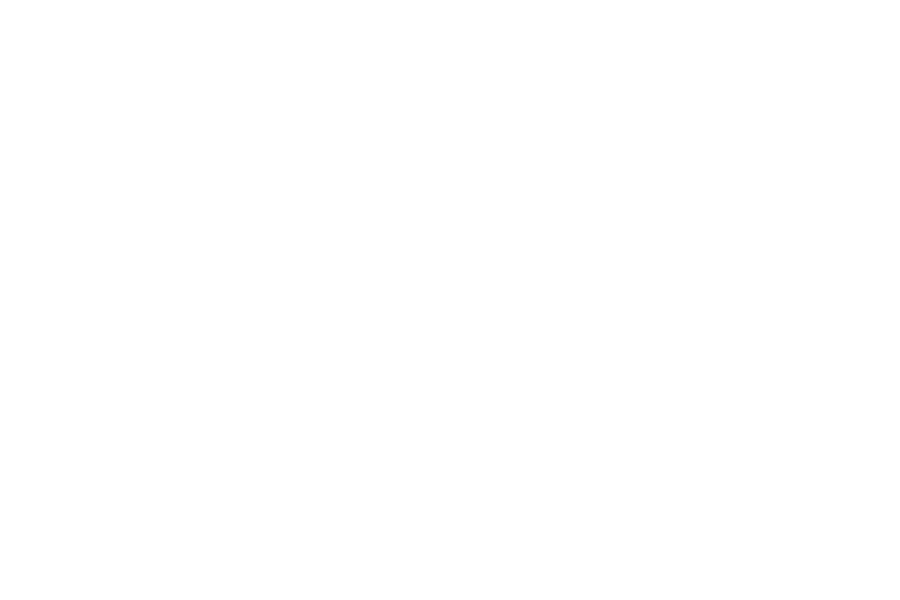

In [55]:
plt.figure(figsize=(9, 6))

plt.plot(k_list, acc_train_list, 'o', color='blue', label='treino')
plt.plot(k_list, acc_val_list, 'x', color='red', label='validação')
plt.xlabel("Valor de 'k'")
plt.ylabel("Acurácia")
plt.legend(loc='best')

plt.show()

In [56]:
print('k \t acc. treino \t acc. val')
print('----------------------------')
for k_, acc_t, acc_v in zip(k_list, acc_train_list, acc_val_list):
    print(f'{k_} \t {acc_t:.4f} \t {acc_v:.4f}')

k_best = k_list[np.argmax(acc_val_list)]
print(f'\nMelhor \'k\': {k_best} ({np.max(acc_val_list):.4f} acc.)')

k 	 acc. treino 	 acc. val
----------------------------
1 	 1.0000 	 0.7222
3 	 0.8466 	 0.7302
5 	 0.8201 	 0.7460
7 	 0.8016 	 0.7619
9 	 0.8069 	 0.7619

Melhor 'k': 7 (0.7619 acc.)


### Testando o melhor selecionado com o conjunto de testes

In [57]:
# Constrói um classificador K-NN. K = k_best
clf = neighbors.KNeighborsClassifier(n_neighbors=k_best)

# Treinando o classificador
clf.fit(X_train_2_norm, y_train_2)

# Testando o classificador (usando o conjunto de TESTES)
pred = clf.predict(X_test_norm)
acc_val = metrics.accuracy_score(y_test, pred)

C:\Users\caio-\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


* Matriz de confusão e relatório de classificação

In [58]:
print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, pred))


Matriz de confusão:
[[54  0  0  0]
 [ 0 24 14 16]
 [ 0  0 54  0]
 [ 0  2 12 40]]

Relatório de classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        54
         bat       0.92      0.44      0.60        54
      beetle       0.68      1.00      0.81        54
        bone       0.71      0.74      0.73        54

    accuracy                           0.80       216
   macro avg       0.83      0.80      0.78       216
weighted avg       0.83      0.80      0.78       216

